<a href="https://colab.research.google.com/github/srivastavavansh94/Diabetes-Prediction/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

LOADING THE DATASET OF DIABETES

In [2]:
diabetes_df = pd.read_csv('/content/diabetes.csv')

GETTING FEW ROWS FROM DATASET

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


GETTING DETAILS ABOUT THE DATASET

In [4]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


STATISTICS OF DATASET

In [5]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

REPLACING 0 VALUE WITH NaN

In [7]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

NULL VALUES IN OUR DATASET

In [8]:
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


PLOTTING GRAPH FOR NaN DATA

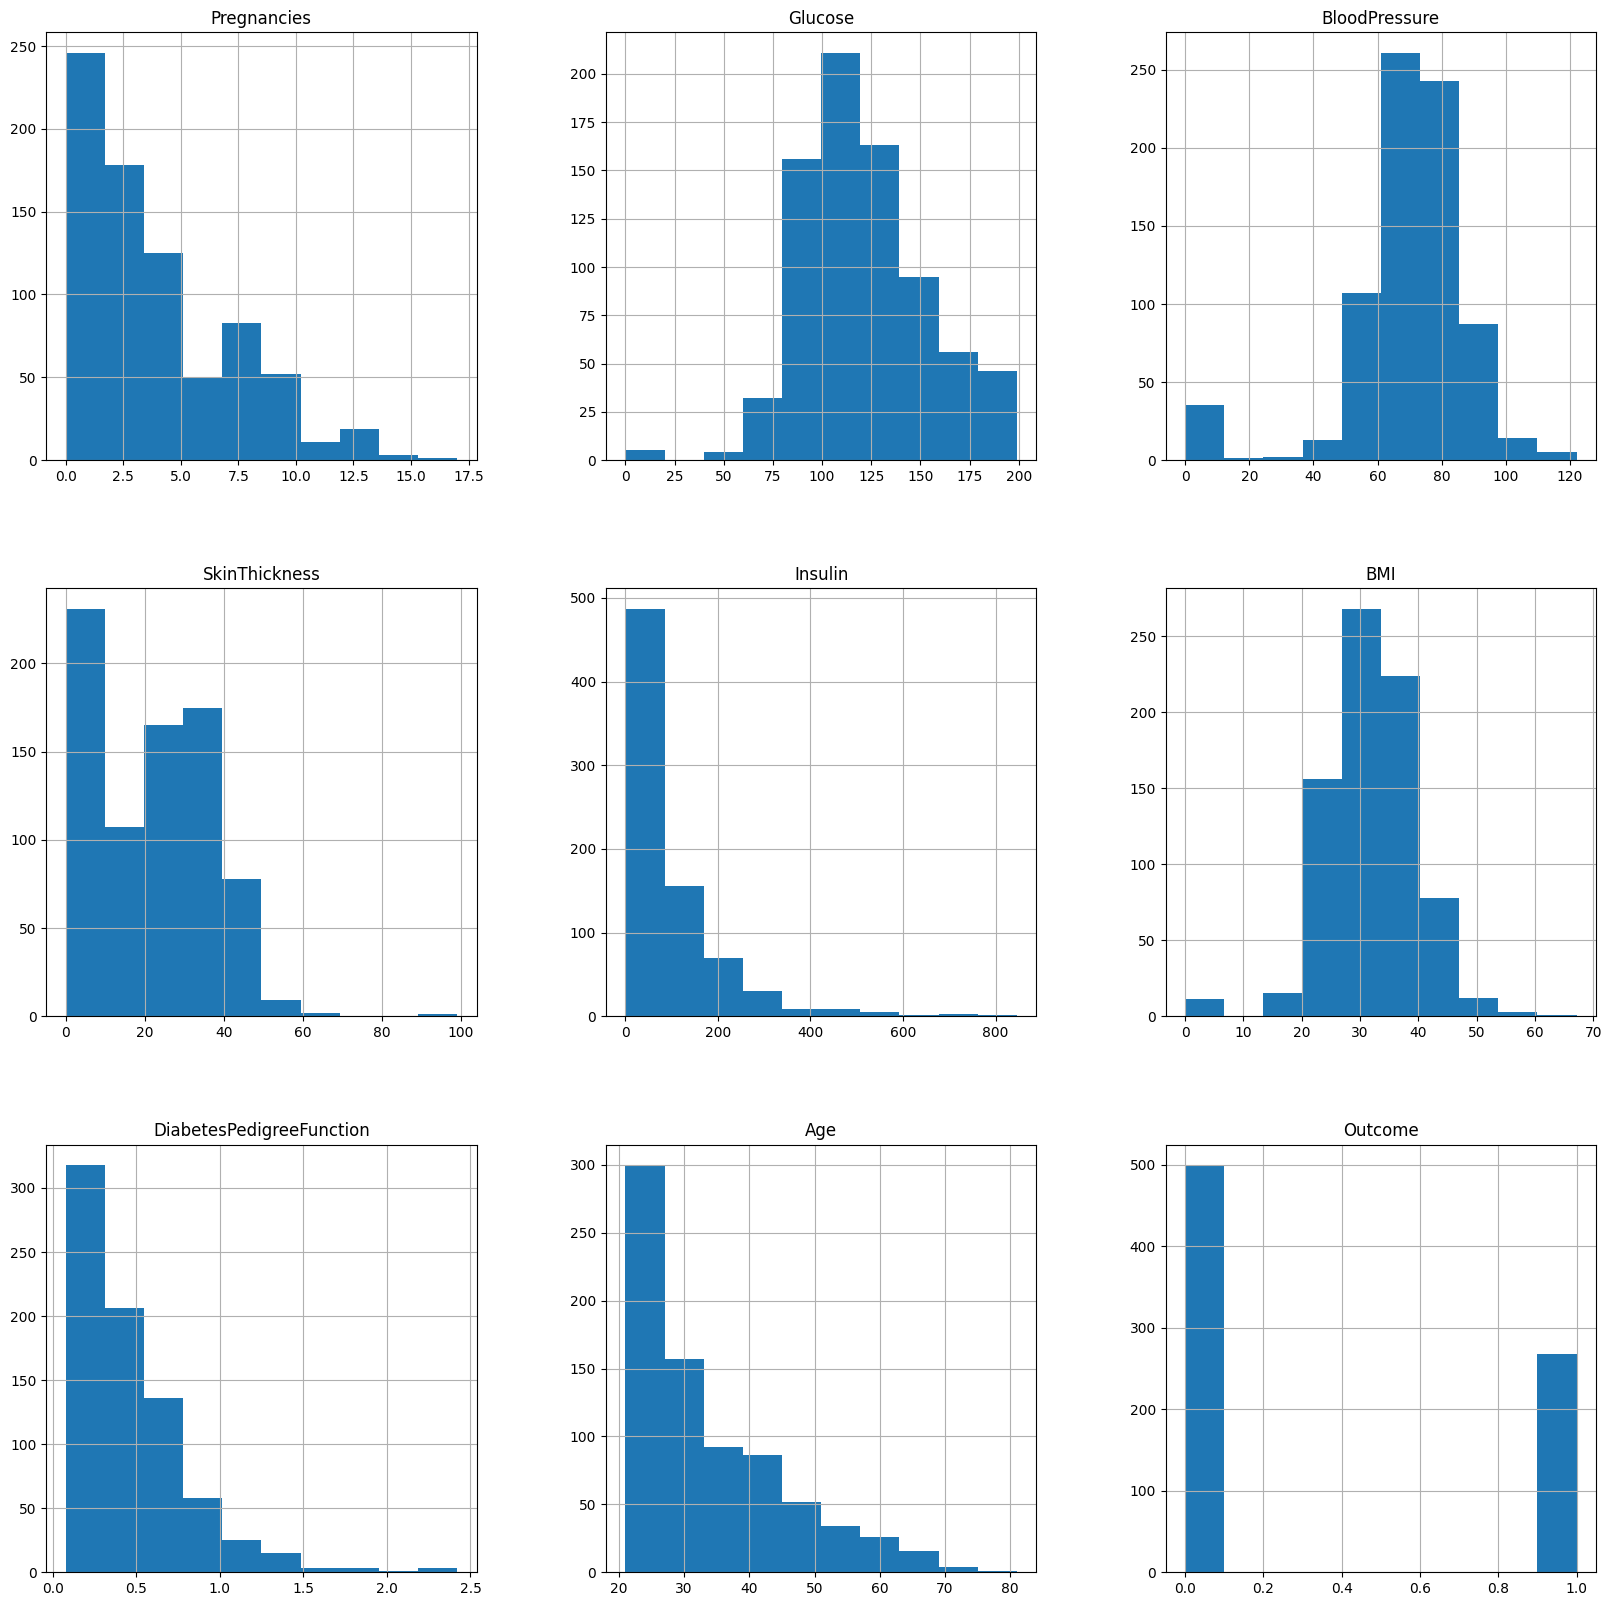

In [9]:
p = diabetes_df.hist(figsize = (20,20))

FILLING NaN VALUE WITH MEAN AND MEDIAN

In [10]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

PLOTTING GRAPH FOR CLEANED DATASET

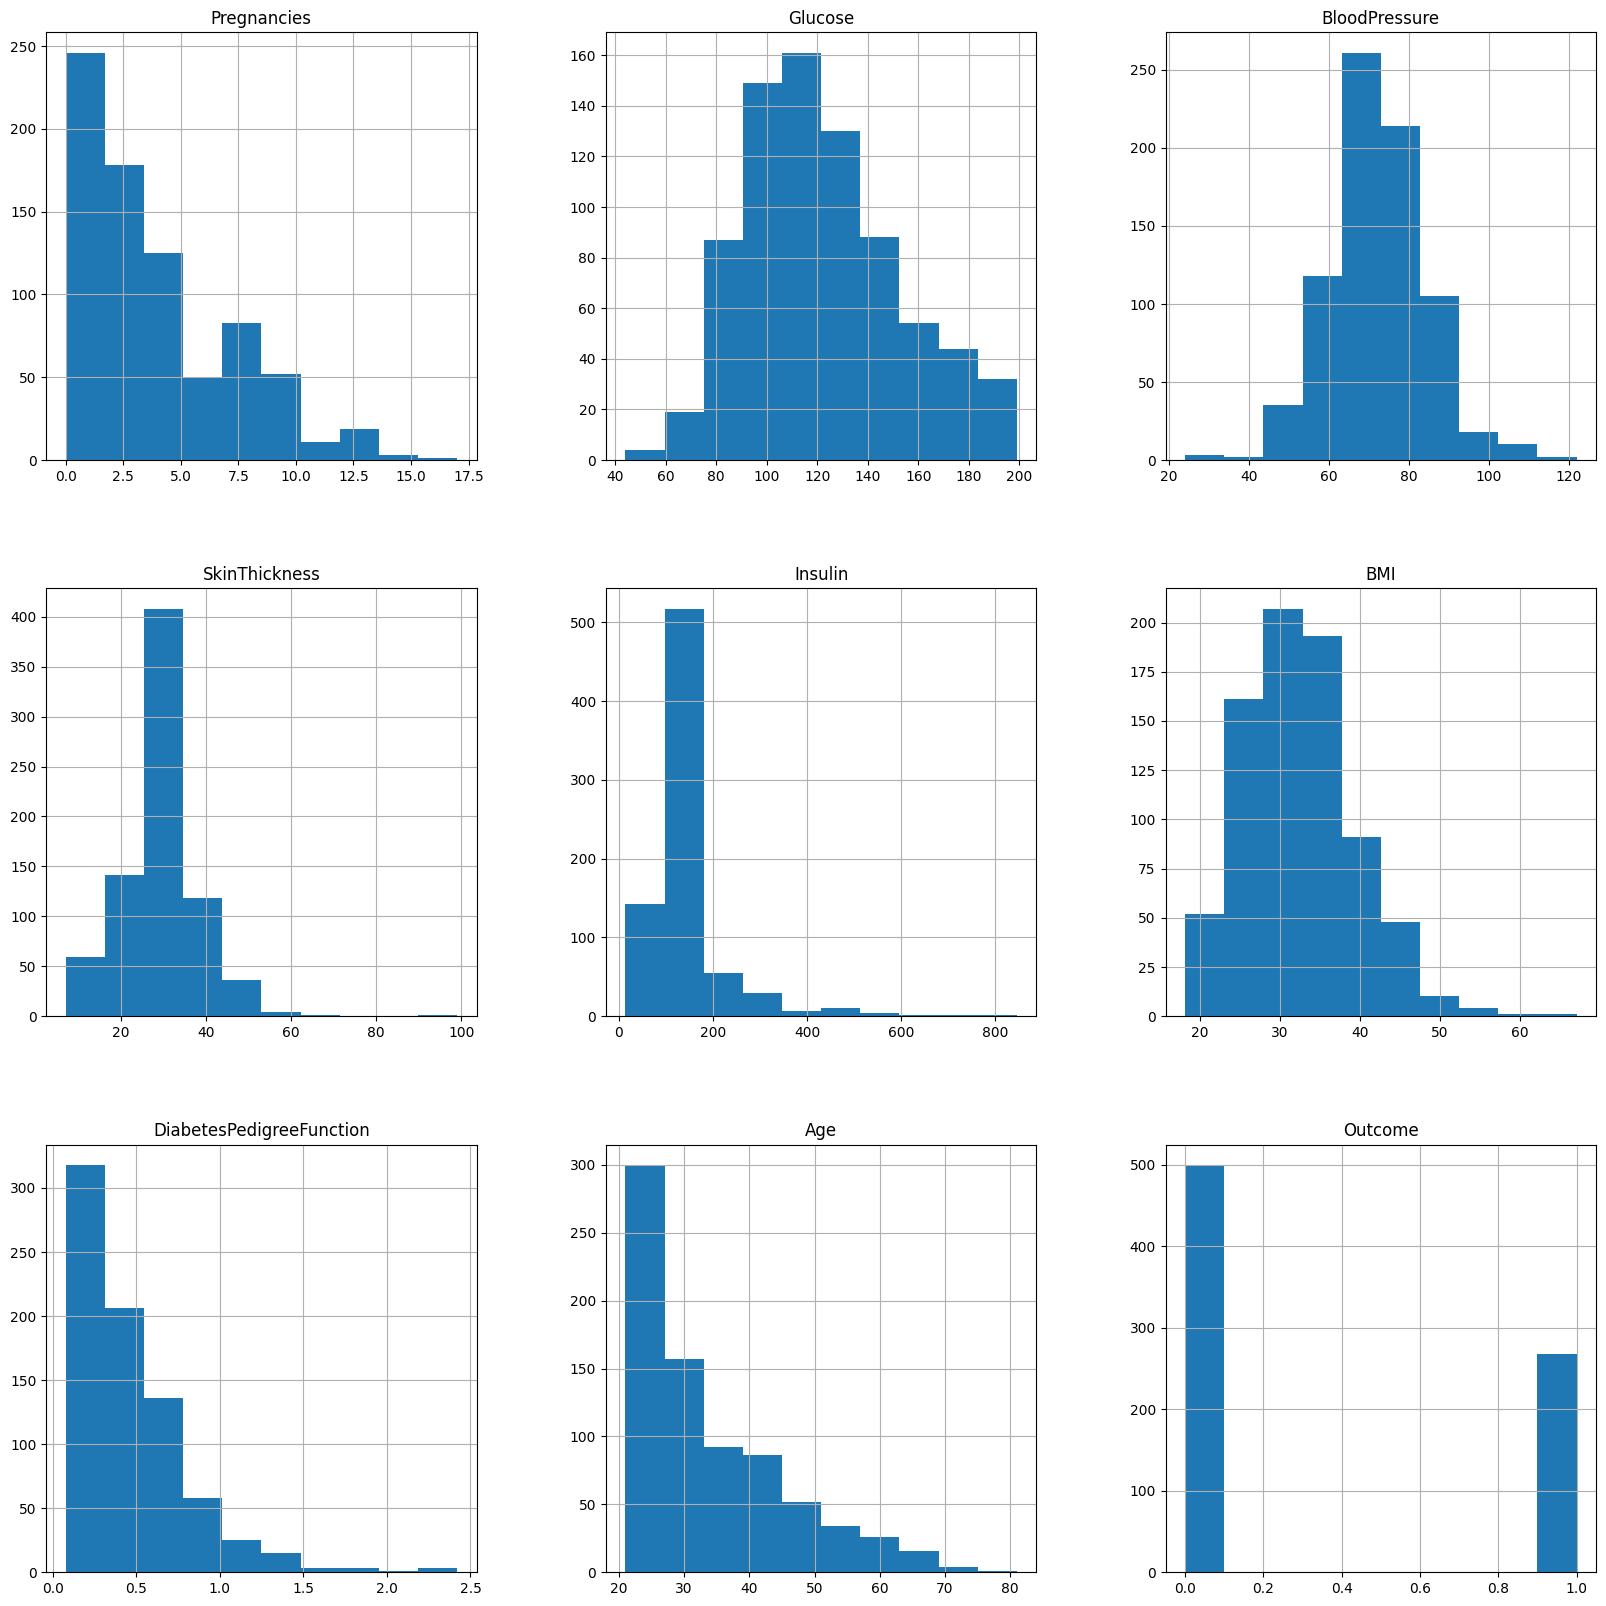

In [11]:
p = diabetes_df_copy.hist(figsize = (20,20))

<Axes: xlabel='Outcome', ylabel='count'>

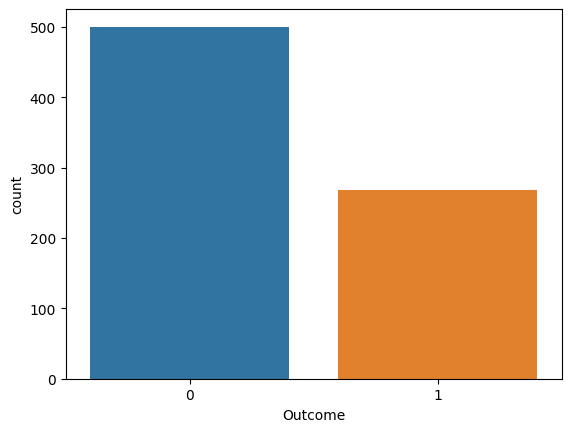

In [12]:
sns.countplot(x = 'Outcome',data=diabetes_df)

In [13]:
print(diabetes_df.Outcome.value_counts())

0    500
1    268
Name: Outcome, dtype: int64


PLOTTING HEATMAP FOR KNOWING RELATION BETWEEN THE ATTRIBUTES

Text(0.5, 1.0, 'Correlation table')

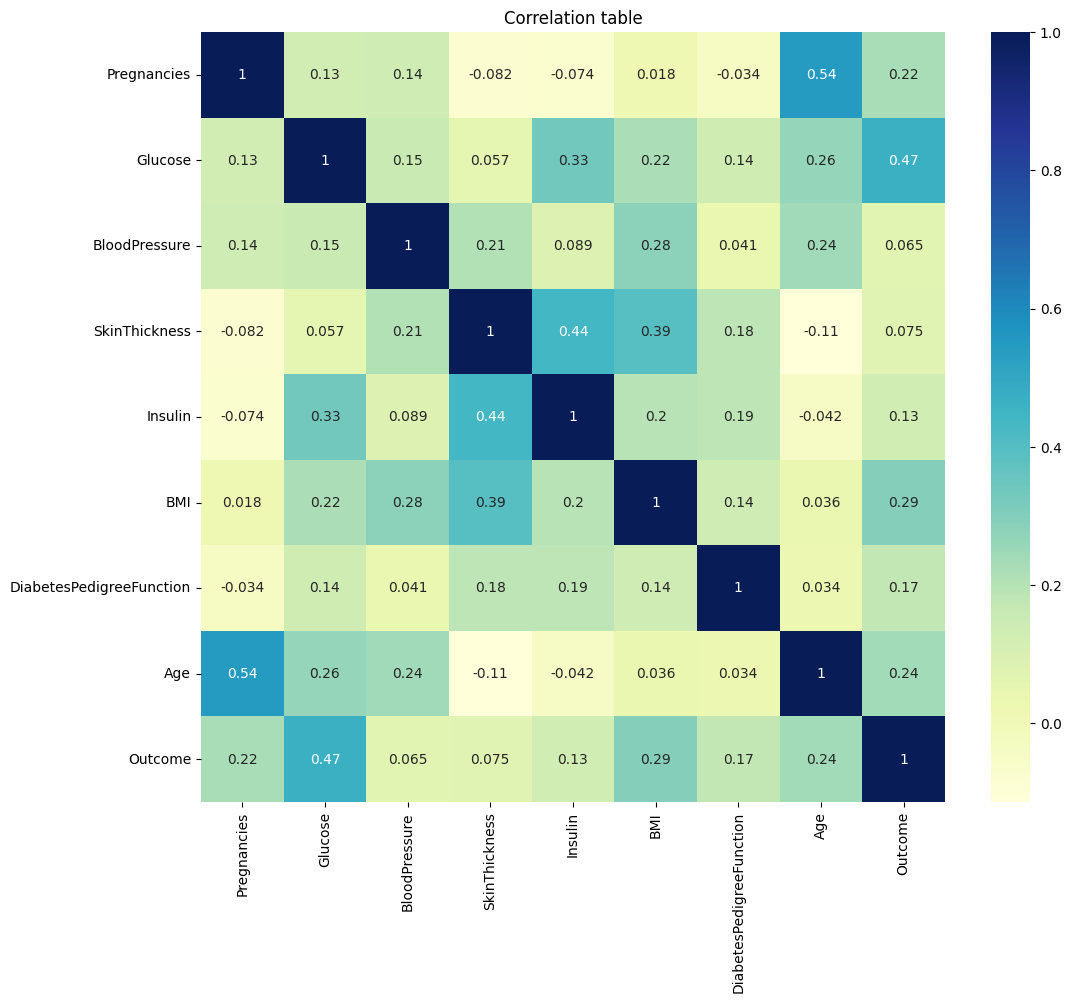

In [14]:
plt.figure(figsize=(12,10))
p = sns.heatmap(diabetes_df.corr(), annot=True,cmap ='YlGnBu')
plt.title('Correlation table')

STANDARDISING THE DATASET

In [15]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [16]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

SPLITTING THE DATA

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=7)

USING DECISION TREE CLASSIFIER FOR GETTING THE ACCURACY

In [18]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)
print("Accuracy Score using DecisionTreeClassifier =", "{:.1f}".format(metrics.accuracy_score(y_test,predictions)*100))

Accuracy Score using DecisionTreeClassifier = 70.5


USING SUPPORT VECTOR CLASSIFIER FOR GETTING THE ACCURACY

In [19]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

svc_pred = svc_model.predict(X_test)


print("Accuracy Score using SVC =", "{:.1f}".format(metrics.accuracy_score(y_test, svc_pred)*100))

Accuracy Score using SVC = 74.8


USING LOGISTIC REGRESSION FOR GETTING THE ACCURACY

In [20]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred_logreg = logreg.predict(X_test)

print("Accuracy Score using Logistic Regression =", "{:.1f}".format(metrics.accuracy_score(y_test, Y_pred_logreg)*100))


Accuracy Score using Logistic Regression = 78.7


SAVING THE MODEL WITH HIGHEST ACCURACY

In [21]:
import pickle

saved_model = pickle.dumps(logreg)

logreg_saved_model = pickle.loads(saved_model)

PREDICTING WHETHER THE PERSON IS DIABETIC OR NOT

In [22]:
predicted_value = logreg_saved_model.predict([[0,137,40,35,168,43.1,2.228,33]])

if(predicted_value[0] == 1):
  print('Person is having Diabetes !')
else:
  print('Person is not having Diabetes !')

Person is having Diabetes !


In [23]:
# sample data of non diabetic person = [10,101,76,48,180,32.9,0.171,63]